https://www.educative.io/courses/grokking-dynamic-programming-patterns-for-coding-interviews/3jEPRo5PDvx

Given a set of positive numbers, find if we can partition it into two subsets such that the sum of elements in both the subsets is equal.

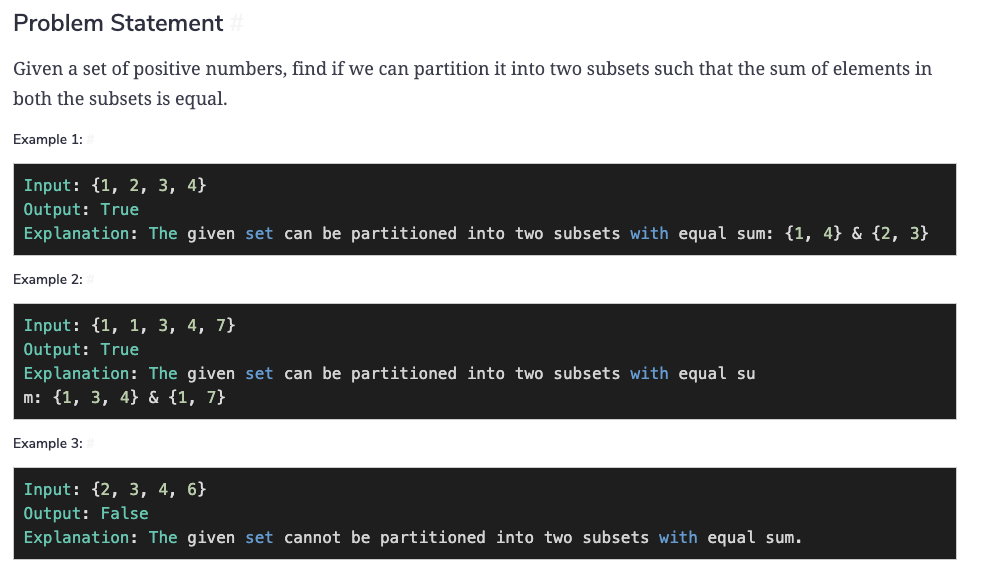

In [7]:
def eqsr(num, s, i):
    """
    brute force.
    """
    if s == 0: 
        return True
    if i >= len(num):
        return False
    if num[i] <= s:
        # note: we dont return the recrusive call's return directly. instead we 
        # only return it if it is true. otherwise we check s without subtracting current index
        if eqsr(num, s - num[i], i+1):
            return True
    return eqsr(num, s, i+1)


def eqs(num):
    s = sum(num)
    if s % 2 != 0 or len(num)==0:
        return False

    return eqsr(num, s/2, 0)

In [8]:
eqs([1,2,3,4])

False

In [13]:
def eqsr(dp, num, s, i):
    """
    dp, memoization
    """
    if s == 0: 
        return 1
    if i >= len(num):
        return 0
    if dp[i][s] == -1:
        
        if num[i] <= s:
            # note: we dont return the recrusive call's return directly. instead we 
            # only return it if it is true. otherwise we check s without subtracting current index
            if eqsr(dp, num, s - num[i], i+1) == 1:
                dp[i][s] = 1
                return 1
        dp[i][s] = eqsr(dp, num, s, i+1)
    return dp[i][s]


def eqs(num):
    s = sum(num)
    if s % 2 != 0 or len(num)==0:
        return False
    s2 = int(s/2)
    dp = [[-1 for _ in range(s2+1)] for _ in range(len(num))]        
    return True if eqsr(dp, num, s2, 0) == 1 else False

In [14]:
eqs([1,2,3,4])

True

In [24]:
def eqs(num):
    """
    tabulation, bottom up approach
    """
    s = sum(num)
    n = len(num)
    
    if s % 2 != 0 or n == 0:
        return False
    
    s = int(s/2)
    dp = [[False for _ in range(s+1)] for _ in range(n)] 
    
    for i in range(n):
        dp[i][0] = True
        
    for j in range(1, s+1):
        dp[0][j] = num[0] == j
        
    for i in range(1, n):
        for j in range(1, s+1):
            if dp[i-1][j]:
                dp[i][j] = True
            elif num[i] <= j:
                dp[i][j] = dp[i-1][j-num[i]]    
    return dp[n-1][s]

In [25]:
eqs([1,2,3,4])

True

# Subset in Array equal to S

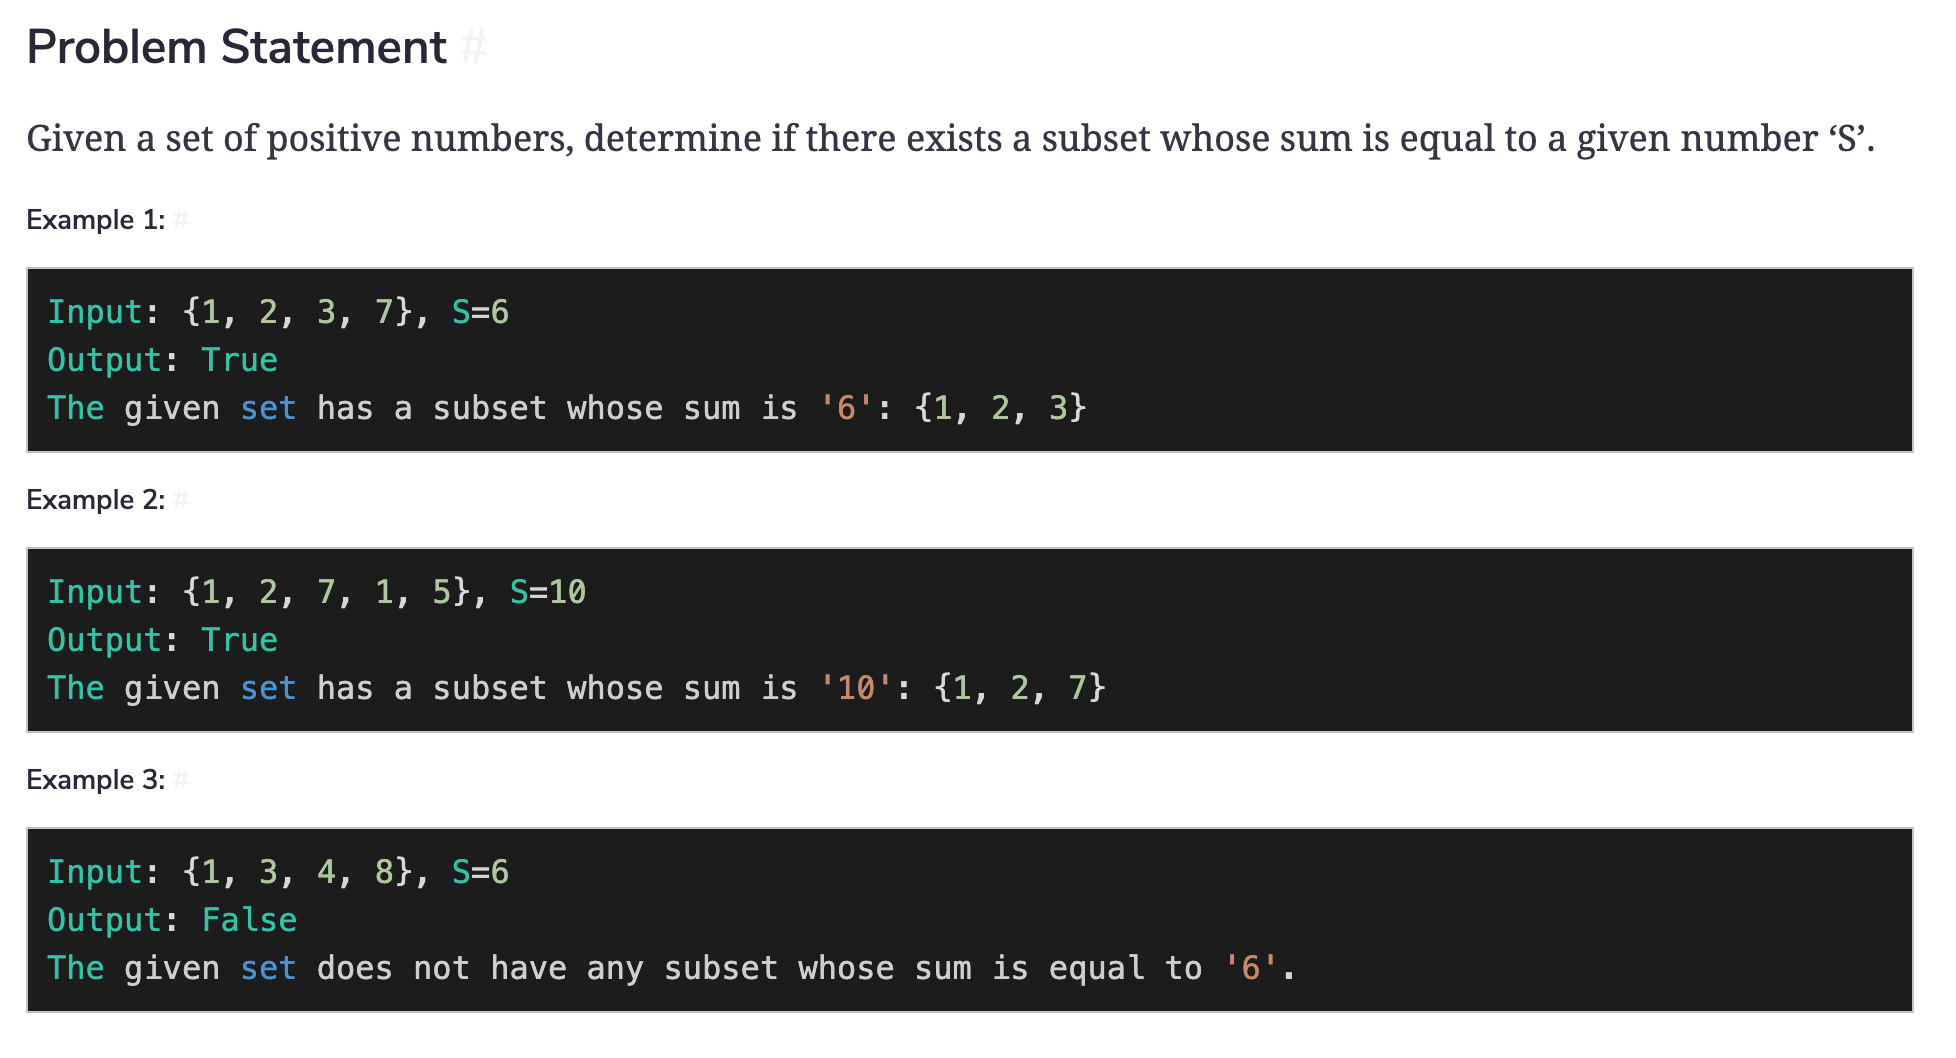

In [59]:
def eqs(num,s):
    """
    memoization
    """
    l = len(num)
    if sum(num) < s or l == 0:
        return False
    def eqsr(i, s):
        if s == 0:
            return True
        if i >= l:
            return False
        if num[i] <= s:
            if eqsr(i+1, s-num[i]):
                return True
        return eqsr(i+1,s)
    return eqsr(0,s)
            

In [60]:
eqs([1,2,3,7],6)

True

In [51]:
eqs([1,2,7,1,5],10)

True

In [52]:
eqs([1,3,4,8],6)

False

# Target Sum

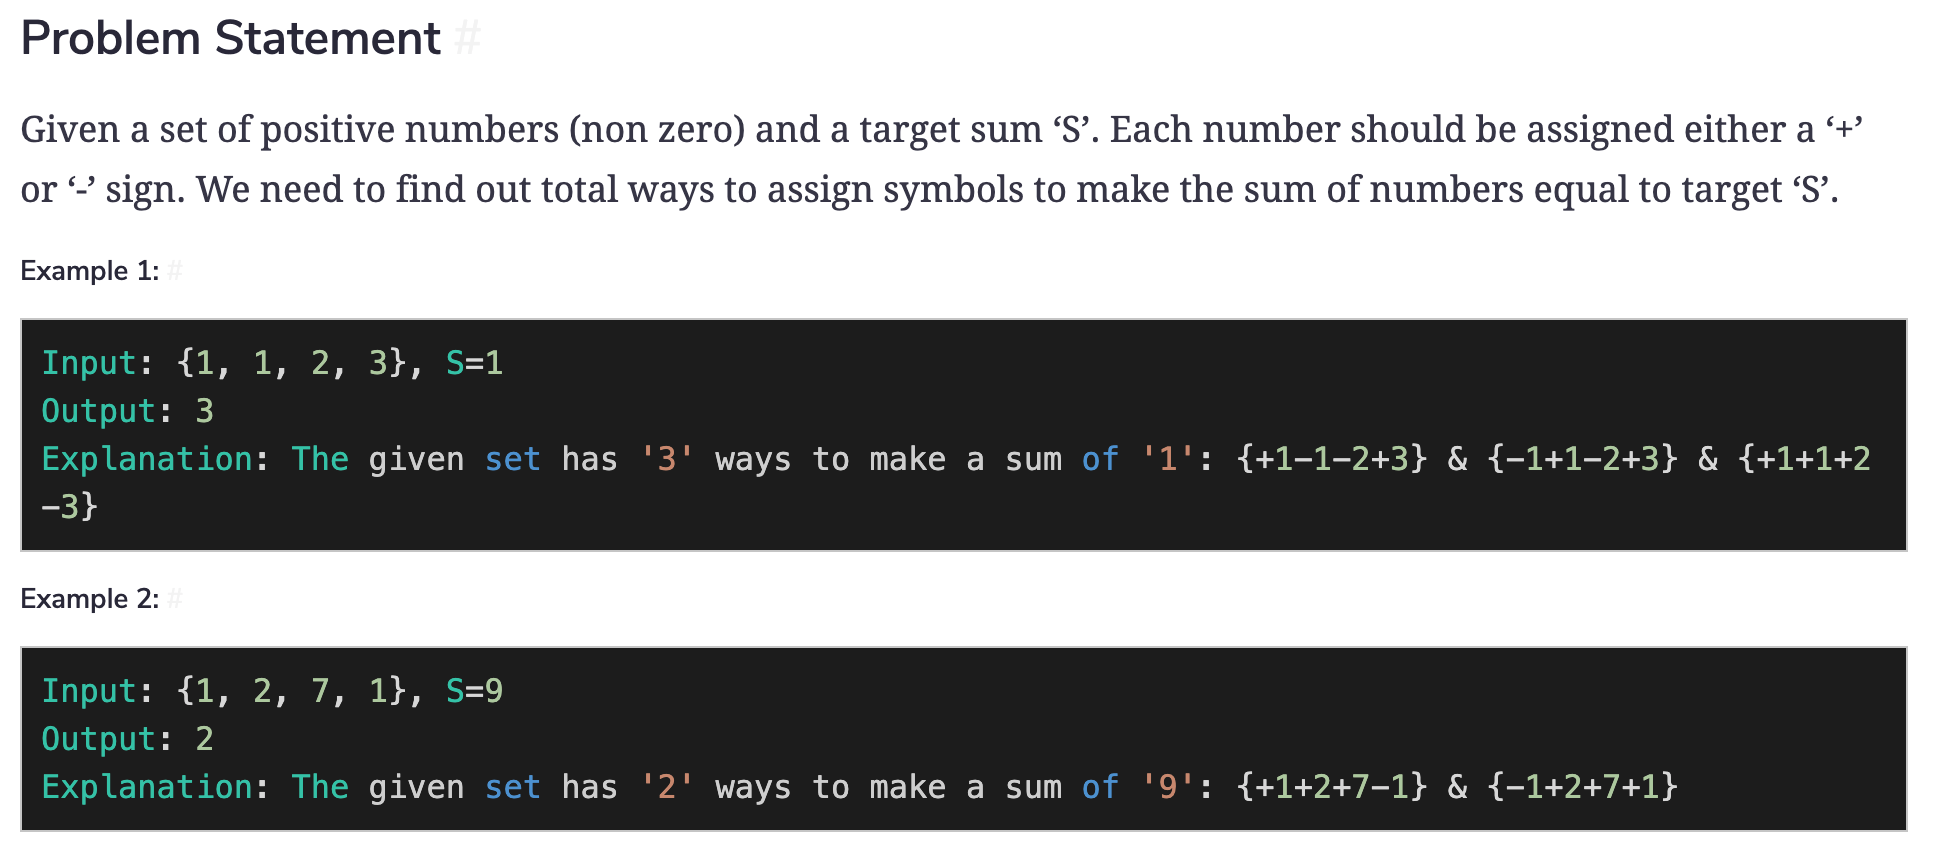

In [78]:
def ts(num, S):
    l = len(num)
    def tsr(i, s):
        if i == l:
            return 1 if s == S else 0
        return tsr(i+1,s+num[i]) + tsr(i+1, s-num[i])
    return tsr(0, 0)

In [79]:
ts([1,1,2,3], 1)

3

In [80]:
ts([1,2,7,1], 9)

2